In [2]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.0.0'

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [9]:
y_test[0]

9

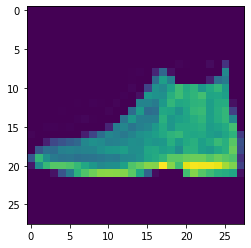

9

In [10]:
%matplotlib inline 

from matplotlib import pyplot as plt
plt.imshow(X_test[0])
plt.show()

# X_test[0]
y_test[0]

In [11]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [12]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
class_names = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [14]:
class_names[y_train_full[0]]

'ankle boot'

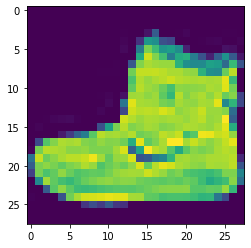

In [15]:
plt.imshow(X_train_full[0])
plt.show()


In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.layers

In [19]:
model.get_layer('dense')

In [20]:
hiddenLayer = model.get_layer('dense')

In [21]:
hiddenLayer.get_weights()

[array([[ 0.07420793, -0.02065875, -0.04453596, ...,  0.0708013 ,
         -0.05347332,  0.01268173],
        [-0.00699427,  0.04635552,  0.00095847, ...,  0.0546874 ,
         -0.01949981, -0.06199545],
        [ 0.02781007, -0.0167914 ,  0.05801368, ..., -0.02226276,
         -0.02524742, -0.01221707],
        ...,
        [-0.03876665, -0.02063074,  0.01283011, ..., -0.01913992,
         -0.01620032,  0.0278308 ],
        [-0.00506352, -0.03112142,  0.00243184, ...,  0.05234334,
         -0.03553311, -0.00701454],
        [ 0.0539877 , -0.06720681,  0.02813862, ...,  0.05526514,
          0.04315478, -0.0652438 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.7294 - accuracy: 0.7598 - val_loss: 0.5240 - val_accuracy: 0.8246
Epoch 2/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.4924 - accuracy: 0.8284 - val_loss: 0.4413 - val_accuracy: 0.8498
Epoch 3/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.4453 - accuracy: 0.8449 - val_loss: 0.4135 - val_accuracy: 0.8574
Epoch 4/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.4173 - accuracy: 0.8550 - val_loss: 0.4150 - val_accuracy: 0.8592
Epoch 5/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3969 - accuracy: 0.8604 - val_loss: 0.3916 - val_accuracy: 0.8668
Epoch 6/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3813 - accuracy: 0.8657 - val_loss: 0.3705 - val_accuracy: 0.8714
Epoch 7/30
55000/55000 [==============================] -

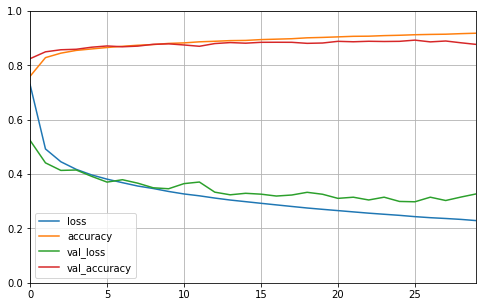

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [26]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[53.92085367050171, 0.8592]

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [32]:
import numpy as np
np.array(class_names)[y_pred]

array(['ankle boot', 'pullover', 'trouser'], dtype='<U11')